In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [436]:
class my_SVM():
    
    def __init__(self,learning_rate=0.01,epochs=100,mylambda=0.1):
    
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.mylambda=mylambda
        
    def hinge_loss(self, X_train, Y_train, coeff, intercept):
        
        loss = 0
        N = X_train.shape[0]
        
        # Loop through each training sample
        for i in range(N):
            # Calculate hinge loss for each sample
            loss += max(0, 1 - Y_train[i] * (np.dot(coeff, X_train[i]) + intercept))
        
        # Add regularization term (L2)
        loss += self.mylambda * np.sum(coeff ** 2)
        
        # Return average loss
        return loss / N
    
    def fit(self,X_train,Y_train):
        
        intercept=0
        losses=[]
        coeff=np.zeros(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(X_train.shape[0]):
                
                # for correct classification
                if( (Y_train[j]*np.dot(coeff,X_train[j])+intercept )>=1):
                    coeff_der=2*self.mylambda*coeff
                    intercept_der=0
                    
                    intercept-=self.learning_rate*intercept_der
                    coeff-=self.learning_rate*coeff_der
                    
                # for incorrect classification
                else:
                    coeff_der=2*self.mylambda * coeff - Y_train[j]*X_train[j]
                    intercept_der=-Y_train[j]
                    
                    intercept-=self.learning_rate*intercept_der
                    coeff-=self.learning_rate*coeff_der
            loss=self.hinge_loss(X_train,Y_train,coeff,intercept)
            losses.append(loss)
        return coeff,intercept,losses
                    


In [437]:
class myLogistic_Rgression():
    
    def __init__(self,learning_rate,epochs):
        self.learning_rate=learning_rate
        self.coeff=None
        self.intercept=None
        self.epochs=epochs
        
    def fit(self,X_train,Y_train):
        
        X=np.insert(X_train,0,1,axis=1)
     
        betas=np.ones(X.shape[1])
        self.intercept=betas[0]=0
        self.coeff=betas[1:]
        for i in range(self.epochs):
            num=np.random.randint(0,X_train.shape[0])
            Y_hat=sigmoid(np.dot(X[num],betas))
            betas+=self.learning_rate*(Y_train[num]-Y_hat)*X[num]
        self.intercept=betas[0]
        self.coeff=betas[1:]
        return self.intercept,self.coeff
    
    def predict(self,X_test):
        df=(np.dot(X_test,self.coeff)+self.intercept)
        for i in range(df.shape[0]):
            ans=sigmoid(df[i])
            if(ans>=0.5):
                df[i]=1
            else:
                df[i]=0
        return df
# use sigmoid as we need to move the line for correctly classified points also
def step(Y):
    return 1 if Y>0 else 0
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [438]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

bc=load_breast_cancer()

In [439]:
X=bc['data']
df=pd.DataFrame(X,columns=bc['feature_names'])
df['target']=bc['target']

In [440]:
sc=StandardScaler()
k=sc.fit_transform(df.drop(columns=['target']))
df=pd.DataFrame(k,columns=df.columns[:-1])
df['target']=bc['target']

In [441]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [442]:
df.shape

(569, 31)

In [443]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)
k=pc.fit_transform(df.drop(columns=['target']))
df=pd.DataFrame(k,columns=['PC1','PC2'])
df['target']=bc['target']

In [445]:
df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [446]:
df.shape

(569, 3)

In [447]:
X_train=df.iloc[0:400,0:2].values
Y_train=df.iloc[0:400,2:3].values
X_test=df.iloc[400:,0:2].values
Y_test=df.iloc[400:,2:3].values

In [448]:
Y_train


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [449]:
msvm=my_SVM(learning_rate=0.001,mylambda=0.001)


In [451]:
coeff,intercept,losses=msvm.fit(X_train,Y_train)
print(coeff,intercept)

[-0.24420373  0.16427035] [1.239]


In [452]:
m=-(coeff[0]/coeff[1])
b=-(intercept/coeff[1])
print(m,b)

1.4865964846362167 [-7.54244441]


In [453]:
xinput=np.linspace(-10,10,100)
yinput=m*xinput+b


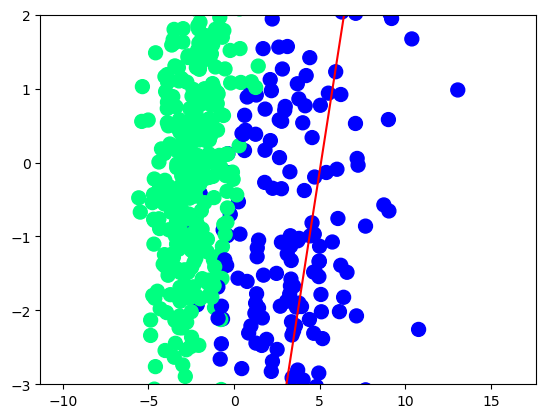

In [454]:
plt.plot(xinput,yinput,color="red")

plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,s=100,c=df['target'].values,cmap="winter")
plt.ylim(-3,2)
plt.show()

# TRYING ON A NEW DATASET



In [455]:
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                       random_state=41,hypercube=False,class_sep=30)

In [456]:
df=pd.DataFrame(X,columns=['cgpa','iq'])
df['placed']=Y

In [457]:
df.head()

,cgpa,iq,placed
0,0.823215,-0.116976,1
1,0.375148,-0.731152,1
2,0.269478,-0.708106,1
3,-4.987449,-2.011992,0
4,0.423128,1.634932,1


In [458]:
X_train=df.iloc[0:80,0:2].values
Y_train=df.iloc[0:80,2:3].values
X_test=df.iloc[80:100,0:2].values
Y_test=df.iloc[80:100,2:3].values

In [459]:
msvm=my_SVM(learning_rate=0.0012,epochs=500,mylambda=0.001)
coeff,intercept,losses=msvm.fit(X_train,Y_train)
print(coeff,intercept)

[0.54092259 0.07623762] [0.9084]


In [460]:
mlr=myLogistic_Rgression(learning_rate=0.1,epochs=500)
intercept2,coeff2=mlr.fit(X_train,Y_train)
print(intercept,coeff)

[0.9084] [0.54092259 0.07623762]


In [461]:
m=-(coeff[0]/coeff[1])
b=-(intercept/coeff[1])
print(m,b)

-7.095219044994966 [-11.91537772]


In [462]:
m2=-(coeff2[0]/coeff2[1])
b2=-(intercept2/coeff2[1])
print(m2,b2)

-8.301423739667051 -6.709760024575149


In [463]:

xinput=np.linspace(-3,3,100)
yinput=m*xinput+b


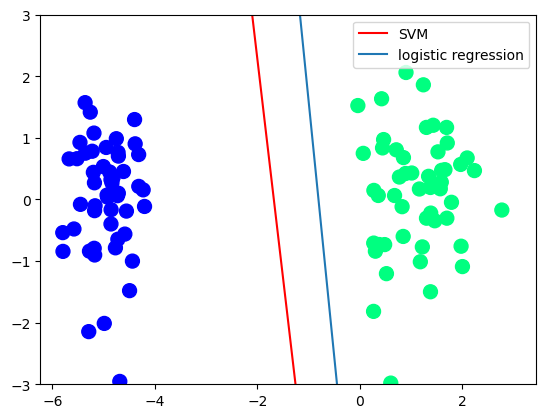

In [471]:
plt.plot(xinput,yinput,color="red",label="SVM")
xinput2=np.linspace(-3,3,200)
plt.plot(xinput2,xinput2*m2+b2,label="logistic regression")
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,s=100,c=df['placed'].values,cmap="winter")
plt.ylim(-3,3)
plt.legend()
plt.show()


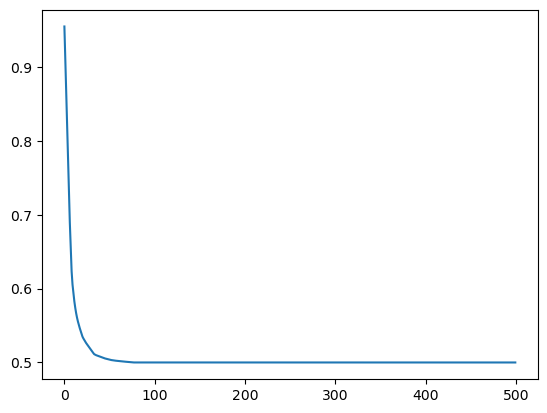

In [301]:
plt.plot(range(500),losses)

# SHAABAASH SHER 
![Sher Image](./sher.jpg)
